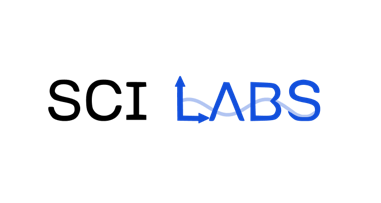

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Dažďové zrážky

V tejto úlohe sa pozrieme na dáta z meteorologickej stanice Vrbovce. V dňoch 12.-13.9.2024 pri tejto stanici výdatne pršalo. Vďaka dátam z tejto stanice môžeme vypočítať výšku hladiny alebo objem vody v pohári, ktorý by sme vedľa stanice umiestnili pri týchto zrážkach.

In [ ]:
data = pd.read_csv("Data.txt", sep = "\t", comment = "#")

#Zdroj dat: https://www.shmu.sk/sk/?page=838&id=&stationId=APS215100&uhrny=24#!

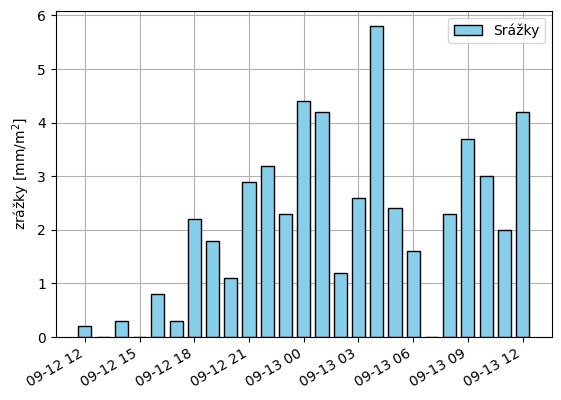

In [ ]:

# Načtení dat
dates = data["Čas merania"]
values = data["Zrážky 1h"]

# Prevedenie dátumu z textovej podoby do datetime objektu
dates = [datetime.strptime(date, "%d.%m.%Y %H:%M") for date in dates]

# Vykreslenie grafu
plt.bar(dates, values, label = "Srážky", width = 0.03, color = "skyblue", edgecolor = "black", zorder = 2)

# Formátovanie osi X (dátumy), aby sa údaje neprekrývali
plt.gcf().autofmt_xdate()

plt.grid()

# plt.xlabel("Doba merania")
plt.ylabel("zrážky [mm/m$^2$]")
plt.legend()
plt.show()

O 12:00 12.9.2024 umiestníme vedľa meracej stanice vo Vrbovciach pohár valcového tvaru s výškou $v = 13,5$ cm a priemeru $d = 8$ cm. Bude po 24 hodinách pohár plný? Koľko bude v pohári vody?

Pretože je pohár valcového tvaru, bude záležať len na výške pohára. Celkovú výšku hladiny v pohári vypočítame jednoduchým súčtom zrážok. Pretože údaje v tabuľke sú vždy zrážky za uplnulú hodinu, tak dáta začneme sčítavať až od 12.09.2024 13:00 namiesto 12.09.2024 12:00.

In [ ]:
v_help = 0                          # Pomocná premenná
data["Vyska hladiny"] = 0           # Založenie nového stĺpca v našej DataFrame premennej

for i in range(1,len(data)):
    v_help = data.loc[i, "Zrážky 1h"]
    if i == 0:
        data.loc[i, "Vyska hladiny"] = v_help
    else:
        data.loc[i, "Vyska hladiny"] = data.loc[i-1, "Vyska hladiny"]+v_help

C:\Users\aminnakh\AppData\Local\Temp\ipykernel_2904\4172481827.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i, "Vyska hladiny"] = data.loc[i-1, "Vyska hladiny"]+v_help


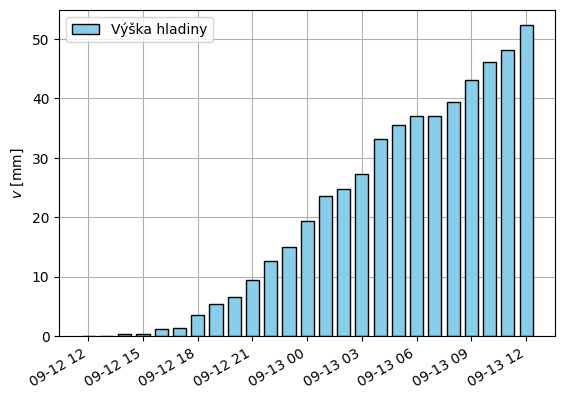

In [ ]:

# Načítanie dat
dates = data["Čas merania"]
values = data["Vyska hladiny"]

# Premena Dátumu z textového formátu do objektu DateTime
dates = [datetime.strptime(date, "%d.%m.%Y %H:%M") for date in dates]

# Vykreslenie grafu
plt.bar(dates, values, label = "Výška hladiny", width = 0.03, color = "skyblue", edgecolor = "black", zorder = 2)

# Formátovanie osi X (dátumy), aby sa údaje neprekrývali
plt.gcf().autofmt_xdate()

plt.grid()


plt.ylabel("$v$ [mm]")
plt.legend()
plt.show()

In [ ]:
v = data.loc[24, "Vyska hladiny"]

print(f"Výška hladniy v pohári po 24 hodinách bude {v:,.1f} mm, takže náš pohár plný nebude.")

Výška hladniy v pohári po 24 hodinách bude 52.3 mm, takže náš pohár plný nebude.


Aký je objem vody v pohári? Na zodpovedanie tejto otázky využijeme vzorec pre objem valca.

\begin{equation*}
 V = S v = \pi \left(\frac{d}{2} \right)^2 v
\end{equation*}

In [ ]:
d = 0.8 # Hodnota v dm
S = np.pi * (d/2)**2
data["Objem"] = data["Vyska hladiny"]/100*S     #delime 100 aby sme konvertovali na dm

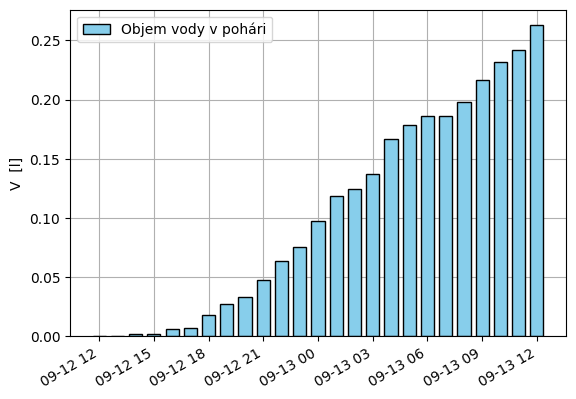

In [ ]:

# Načítanie dat
dates = data["Čas merania"]
values = data["Objem"]

# Premena Dátumu z textového formátu do objektu DateTime
dates = [datetime.strptime(date, "%d.%m.%Y %H:%M") for date in dates]

# Vykreslenie grafu
plt.bar(dates, values, label = "Objem vody v pohári", width = 0.03, color = "skyblue", edgecolor = "black", zorder = 2)

# Formátovanie osi X (dátumy), aby sa údaje neprekrývali
plt.gcf().autofmt_xdate()

# Mriežkové pozadie grafu
plt.grid()

plt.ylabel("V  [l]")
plt.legend()
plt.show()

In [ ]:
print(f"Do pohára počas 24 hodín napršalo {data.loc[24, 'Objem']:,.2f} litra.")

Do pohára počas 24 hodín napršalo 0.26 litra.
